//  ~ https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.html

## Site location problem

### Imagine you are a factory location analyst and you've been asked to help locate a factory that makes rock aggregate somewhere in the UK.

The company you've been dealing with want to experiment with several factors that they think are important in the location process. They want an application that combines maps of the UK that represent the things that are important to them. Each map has a shading intensity which represents the best areas on the basis of different factors. For example, on the population map the areas near near city centres will be lighter than other areas. The maps need weights attributing to them depending on GUI scrollbars that the company execs can play with. They like that kind of thing.

The maps are stored in files containing values between 0 and 255. 255 represents the best areas.

### Write a Jupyter Notebook which does the following.

1. Takes in three maps of the UK: one which displays the importance of transport; one good geology areas; one population workforce. The higher the figures, the better the place for the company.

2. Makes a display that combines/merges the maps, with the weighting on each map determined by one of three scrollbars, and displays them combined. I.e. if you turn up the scrollbars for geology and population and turn down the one for transport, the first two maps will be merged and the shading on the map will be 50 percent due to each. For a badly coded example see [here](http://www.ccg.leeds.ac.uk/teaching/nuclearwaste/).

To do this, take the three values for each pixel (one value from the geology, one from the population, one from the transport), and multiple each by the scrollbar value for that map. Then add the values from the three maps together. Repeat this for all the pixels, and then re-range the dataset so that the numbers come out in the 0 to 255 range. Use this dataset to then construct a grayscale image.

3. Allows the user of the Notebook to save the weighted map they are happiest with as a raster style comma-separated text file where each line equals one line of the image. The figures should range between 0 and 255.

In [118]:
import matplotlib.pyplot as plt

import mpld3
mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = [9.5,6]


import csv
import urllib.request
import codecs

def get_csv_map(url):
    array = []
    ftpstream = urllib.request.urlopen(url)
    csvfile = csv.reader(codecs.iterdecode(ftpstream, 'utf-8'))
    for line in csvfile:
        integers = []
        for value in line:
            integer_value = int(value)
            integers.append(integer_value)
        array.append(integers)
    return array
        
transport = get_csv_map('https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.mway')
geology = get_csv_map('https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.geology')
population = get_csv_map('https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.pop')

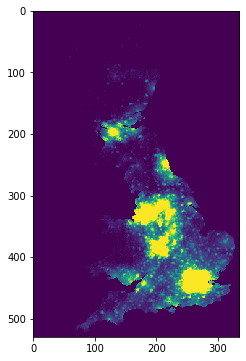

In [121]:
map = [transport, geology, population]
plt.imshow(map[2])


335


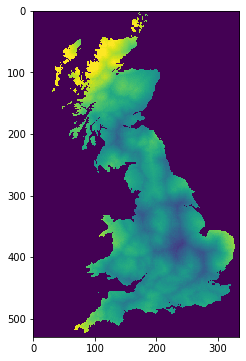

In [123]:
# make a display that combines/merges the maps,  
# with weighting on each map determined by one of three scrollbars
# and displays them combined

transport_weight = 100
geology_weight = 100
population_weight = 100

cumulative = []

print(len(transport[0]))

for i in range(len(transport)):
    cumulative_line = []
    for j in range(len(transport[0])):
        
        cumulative_line.append(int(transport[i][j] * transport_weight + geology[i][j] * geology_weight + population[i][j] * population_weight / 300))
    cumulative.append(cumulative_line)

plt.imshow(cumulative)

### Additional marks are awarded for the following.

Allow them to display the top 10 percent of the areas in blue if they want, then return it to greyscale. The lightness of the blue should still reflect the underlying values.

### Files for this project.

3 x raster files representing the geology, transport network, and population density of the UK. All files listed from top left to bottom right. Each line is a line in the raster.

- [Geology](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.geology) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/bestgeology.gif) for comparison, don't use this in the project.)
- [Transport](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.mway) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/bestmway.gif) for comparison, don't use this in the project.)
- [Population](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/best.pop) ([GIF version](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/bestpop.gif) for comparison, don't use this in the project.)